# **DATA 3300**
## **ICE - Clustering Analysis**

# Name: Rhett Jorgensen
## Exercise:

### Q1
**Load the required packages and then import the dataset**

In [1]:
!pip install kneed # this library doesn't come pre-loaded with Google Colab, so let's install it (if using Google Colab) - 

# if using Jupyter Notebooks, you can install a library from the terminal (as referenced in the Module 4 ICE video) using `pip install kneed`

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from kneed import KneeLocator
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/content/sandp500.csv")
df.head()

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book
0,A,Agilent Technologies Inc,Health Care,51.21,1.02,32.85,1.56,13.35,37.62,52.26,16.49,0.942,3.89,3.84
1,AAL,American Airlines Group,Industrials,44.84,0.85,9.32,4.81,7.46,24.85,50.64,22.61,7.830,0.57,6.07
2,AAP,Advance Auto Parts,Consumer Discretionary,151.99,0.15,24.51,6.20,39.66,132.98,177.83,11.18,1.120,1.19,3.89
3,AAPL,Apple Inc.,Information Technology,139.52,1.63,16.75,8.33,25.19,89.47,140.28,732.00,69.750,3.35,5.53
4,ABBV,AbbVie,Health Care,63.69,4.04,17.55,3.63,2.91,54.41,68.12,101.52,10.950,3.95,21.83


#### 1A 
**Before running the actual clustering analysis, you're going to exclude the Symbol and Name variables. Explain why this is important to do:**

They do not actually add any important data to the data set. They simply act as identifiers for the stocks. They would not be useful in any way to group or cluster these together. They are just primary keys.

#### 1B
**Also there would be a problem with keeping all three of Price, 52 Week High, and 52 Week Low involved when the clustering analysis is run. Explain why this is the case.**

They all measure similar data and it would be slightly irrelevant to include in the clustering as it wouldn't change the clusters very much. It would simply add more complications.

In [4]:
# remove primary keys, redundant variables, and sector
df = df.drop(['Symbol', 'Name', 'Sector', '52 week low', '52 week high'], axis=1)
# remove rows with missing data
df = df.dropna()
df.head()

,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,Market Cap,EBITDA,Price/Sales,Price/Book
0,51.21,1.02,32.85,1.56,13.35,16.49,0.942,3.89,3.84
1,44.84,0.85,9.32,4.81,7.46,22.61,7.830,0.57,6.07
2,151.99,0.15,24.51,6.20,39.66,11.18,1.120,1.19,3.89
3,139.52,1.63,16.75,8.33,25.19,732.00,69.750,3.35,5.53
4,63.69,4.04,17.55,3.63,2.91,101.52,10.950,3.95,21.83


### Q2
**Run a clustering analysis in Python to find three groups of similar stocks.**

**Your analysis should address each of the following considerations (pre-processing)**
1. **It should remove variables not to be included in the analysis**
2. **It should normalize all variables using the Z-transformation method**
3. **It should utilize the K-means clustering method**

In [5]:
# normalize features using the StandardScaler function
features = df
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.3846388 , -0.65969446,  0.07617064, ..., -0.44080382,
         0.21163671, -0.17976872],
       [-0.43859869, -0.78805688, -0.53396148, ...,  0.64328762,
        -0.95969278, -0.03094617],
       [ 0.46906269, -1.31660801, -0.14008529, ..., -0.41278868,
        -0.74095052, -0.17643189],
       ...,
       [ 0.17325741, -0.8182598 ,  1.23472156, ..., -0.14837613,
        -0.07766756, -0.27386728],
       [-0.43487148, -0.89376711, -0.18572203, ..., -0.58906371,
         0.25397392, -0.3472775 ],
       [-0.36888284, -0.83336126,  0.05827896, ..., -0.32150339,
         0.72321133,  0.7378591 ]])

In [6]:
# set kmeans paramters with k = 3
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42,
)

In [7]:
# fit kmeans model to scaled data
kmeans.fit(scaled_features)
# print the interia value of the model
kmeans.inertia_

2858.255995389018

### Q3
**Use the Elbow rule to determine the optimal number of clusters between 1-11 by:**
1. **Running k-means iteratively on k of size 1-11**
2. **Plotting the SSE curve by k size**
3. **Using the Knee Locator method**

In [9]:
 # create a kmeans initialization dictionary
kmeans_elbow = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# create empty list for SSE values
sse = []
# create for loop to fit kmeans clustering analysis on k of size 1-11, add SSE values for each model to the list
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, **kmeans_elbow)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

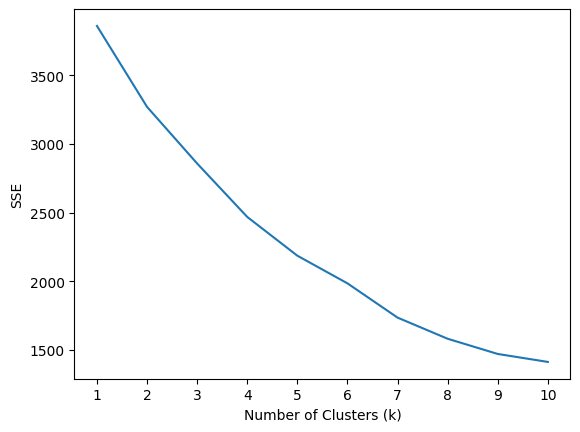

In [10]:
# Create an elbow plot
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show

In [11]:
# locate the knee in the plot
k1 = KneeLocator(
    range(1,11), sse, curve="convex", direction="decreasing"
)
k1.elbow

5

### Q4
**Rerun kmeans with the optimal number of clusters and report its SSE value. Is it less than when k was set to 3? Why would this occur?**

In [12]:
# change kmeans parameters for 5 clusters
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42,
)

In [13]:
# fit the kmeans model to the data
kmeans.fit(scaled_features)
# examine SSE value
kmeans.inertia_

2186.265828273417

Yes it is less than when the k was set to 3. This is because we updated the number of clusters to 5 which was the elbow point. If having 5 clusters increases similarity in clusters and greater distance between clusters the number gets lower. 

### Q5

**Generate a centroid table using the cluster_centers_ feature from kmeans, convert the array into a dataframe. Which cluster of stocks are the highest price on average, how do you know?**

In [14]:
# save cluster centroids to an object called 'centroids'
centroids = kmeans.cluster_centers_
# create centroid table from numpy array
centroid_table = pd.DataFrame(centroids, columns = ["Price", "Dividend Yeild", "Price/Earnings", "Earnings/Share", "Book Value", "Market Cap", "EBITDA", "Price/Sales", "Price/Book"],
                              index = ["Cluster_0", "Cluster_1", "Cluster_2", "Cluster_3", "Cluster_4"])
# display table
centroid_table

,Price,Dividend Yeild,Price/Earnings,Earnings/Share,Book Value,Market Cap,EBITDA,Price/Sales,Price/Book
Cluster_0,-0.133549,-0.071913,-0.135327,-0.084925,-0.059295,-0.243287,-0.199286,-0.349279,-0.105973
Cluster_1,4.647560,-0.919655,-0.136974,5.349959,5.633525,1.389623,0.687356,0.987819,-0.200743
Cluster_2,-0.028788,0.671670,-0.205345,0.213082,-0.323530,2.365095,2.482854,-0.019056,0.854325
Cluster_3,1.671767,-1.009185,6.567219,-0.710167,-0.052085,0.556646,-0.237760,1.638501,0.830051
Cluster_4,0.025248,0.333982,0.131064,-0.214381,-0.184725,-0.113678,-0.271082,1.977310,0.090114


Cluster_1 has the highest average price. We know this because the centroid value is at 4.647560 which higher than all the rest and 4 SDs above average.

### Q6 

**Now create a new centroid table after de-normalizing the centroid values. Why is it important to de-normalize your centroids after the fact?**

In [15]:
# de-normalize centroid values from centroids object
unscaled = scaler.inverse_transform(centroids)
# recreate centroid table with de-normalized centroid values
unscaled_table = pd.DataFrame(unscaled, columns = ["Price", "Dividend Yeild", "Price/Earnings", "Earnings/Share", "Book Value", "Market Cap", "EBITDA", "Price/Sales", "Price/Book"],
                              index = ["Cluster_0", "Cluster_1", "Cluster_2", "Cluster_3", "Cluster_4"])
# display table
unscaled_table

,Price,Dividend Yeild,Price/Earnings,Earnings/Share,Book Value,Market Cap,EBITDA,Price/Sales,Price/Book
Cluster_0,80.851347,1.798443,24.693503,3.800030,25.695180,26.550240,2.476534,2.300150,4.945778
Cluster_1,645.264286,0.675714,24.630000,25.531429,181.795714,148.054286,8.110000,6.090000,3.525714
Cluster_2,93.218387,2.783226,21.993226,4.991613,18.449677,220.638710,19.518065,3.236129,19.335161
Cluster_3,293.970000,0.557143,283.180000,1.300000,25.892857,86.072857,2.232079,7.934286,18.971429
Cluster_4,99.597400,2.336000,34.967000,3.282400,22.255800,36.194400,2.020361,8.894600,7.884000


It is important because it puts the data back into context in its primary scale rather than showing it in SD units. 

### Q7 
**Explore plotting the centroid values to examine differences between clusters across the different variables of interest. Then come up with a brief descriptive title for each of the 5 clusters of stocks:**

1. **Cluser_0:** Average performers/price
2. **Cluster_1:** High priced stocks
3. **Cluster_2:** Average price, High return stocks
4. **Cluster_3:** Above average price, below average returns
5. **Cluster_4** High price/sales stocks

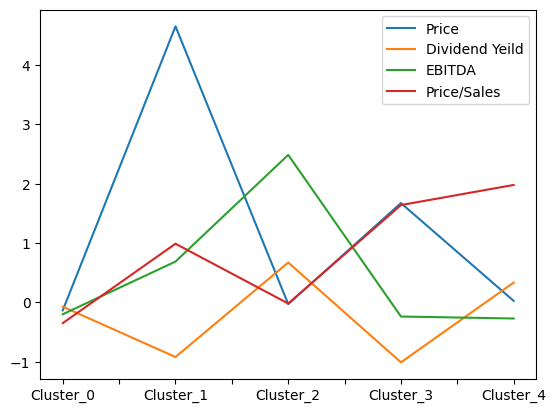

In [17]:
# plot values from centroid table with line chart
centroid_table.plot(kind = "line", y = ["Price", "Dividend Yeild", "EBITDA", "Price/Sales"])
plt.show()

### Q8 

**Based on your plot and centroid tables, describe which cluster of stocks you'd recommend and why. Create a visualization that supports your recommendation. Provide a caption for your visualization that briefly describe what's being shown and why it' relevant.**

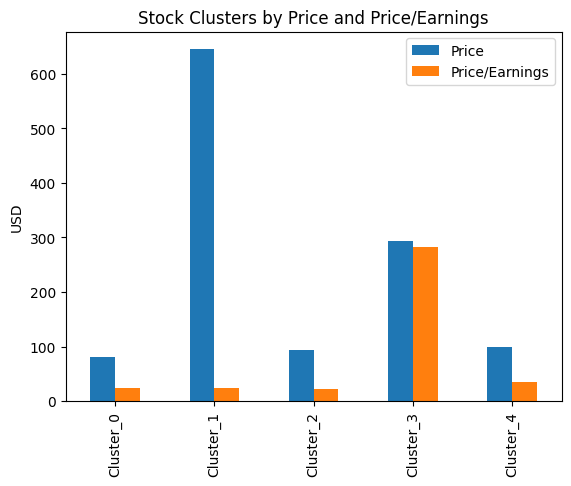

In [21]:
# plot values from centroid table with bar chart
unscaled_table.plot(kind = "bar", y = ['Price', 'Price/Earnings'])
plt.title('Stock Clusters by Price and Price/Earnings')
plt.ylabel('USD')
plt.show()

This chart shows the average price of the stocks in each cluster in comparison to the avereage price/earnings of the stocks in each clusters. Based on this ratio alone it would seem that cluster_0 would be a good investmest because it has a relatively low price as well as a low price/earnings. The worst cluster based on this chart is cluster_3 because it has a very high price/earnings average as well as a semi high average stock price. You would want your price/earnings to be low in order to make more money. Obviously this would not be the only way to analyze these clusters and choose which one would be the best investment but based on this alone these are my conclusions. 